# Homework 6 (DL Friday, November 3 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023


In [1]:
import numpy as np
import scipy.linalg as linalg
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Question: consider the scalar differential equation:

$$\dot{x} = f \, x, \quad x(0) = x_0$$

with $f = - \frac{1}{2}$ and $x_0 = 3$.


### Part a (1 point): Solve the equation analytically and code function $x(t)$ in the section below.

### Hint: one way is to consider $\frac{dx}{dt} = f \, x \rightarrow  \frac{dx}{x} = f dt$, then take integrals from both sides from $0$ to $t$.

### Hint: another option is to use Laplace transform.


In [2]:
def analytical_solution_x(t):
    """ Return the analytical solution of the mentioned ODE.
    Input:
        t: time
    Output:
        solution of the ode
    
    
    """
    return 3*np.exp(-t/2)


    # YOUR CODE HERE
    # raise NotImplementedError()


In [3]:
"""Check the result for several inputs"""
assert np.allclose(analytical_solution_x(0.0), 3.0)
assert np.allclose(analytical_solution_x(2.0), 1.1036, rtol=1e-03, atol=1e-04)

### Part b (1 point): Use Euler’s method to solve the equation numerically.

To use Euler's method, we need ODE function which in this question is:


In [4]:
# ode function
def dxdt(t, x):
    return - 0.5 * x

In [5]:
def Euler_solution(x0, t_0, t_end, dt, dxdt):
    
    T = np.arange(t_0, t_end, dt)       
    x_euler = np.zeros((T.shape[0],))
    x_euler[0] = x0
    
    for i in range(0, T.shape[0] - 1):
        
        #  You should calculate x_euler[i + 1] from  x_euler[i] and you need to call function dxdt(T[i], x_euler[i]).
        
        #  Note: the first argument in dxdt is not used in this question; however, we include it for the sake of completeness.
        #  Also, this argument is necessary while using built-in ODE solver. 
        
        # YOUR CODE HERE
        x_euler[i+1] = x_euler[i] + dxdt(T[i], x_euler[i])*dt
        
        # raise NotImplementedError()
    
    return x_euler
    

In [6]:
"""Check the result for several inputs"""
assert np.allclose(Euler_solution(3.0, 0.0, 10, 0.5, dxdt)[0], 3.0)
assert np.allclose(Euler_solution(3.0, 0.0, 10, 0.5, dxdt)[-1], 0.0127, rtol=1e-03, atol=1e-04)

### Part c (1 points): Use a builtin ODE solver (Python’s odeint) to numerically solve the equation.

In [7]:
def builtin_ODE_solver(x0, t_0, t_end, dt, dxdt):
    T = np.arange(t_0, t_end, dt) 
    # Please check odeint function signature in 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html'
    # Here, because the first argument of the ode function is defined as 't', you must put tfirst=True
    # x_builtin_ODE_solver = ?
    # YOUR CODE HERE
    # raise NotImplementedError()
    x_builtin_ODE_solver = odeint(dxdt, x0, T, tfirst=True)
    return x_builtin_ODE_solver

In [8]:
"""Check the result for several inputs"""
assert np.allclose(builtin_ODE_solver(3.0, 0.0, 10, 0.5, dxdt)[0], 3.0)
assert np.allclose(builtin_ODE_solver(3.0, 0.0, 10, 0.5, dxdt)[-1], 0.02595, rtol=1e-03, atol=1e-04)

### Part d (1 points): Visualize the solutions and compare them to each other.

### Please run the given codes, and as you compare the numerical solutions with the analytical one, observe how the choice of numerical methods and the sampling time can affect the results. 

In [9]:
x0 = 3.0
t_0 = 0.0
t_end = 10
dt_1 = 0.5
T_1 = np.arange(t_0, t_end, dt_1)  

In [10]:
x_analytical_1 = analytical_solution_x(T_1)
x_euler_1 = Euler_solution(x0, t_0, t_end, dt_1, dxdt)
x_odeint_solver_1 = builtin_ODE_solver(x0, t_0, t_end, dt_1, dxdt)

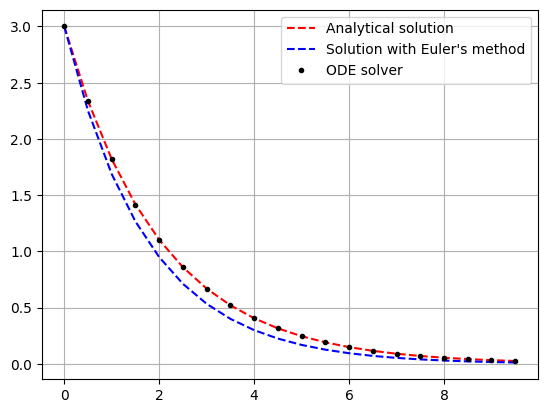

In [11]:
plt.plot(T_1, x_analytical_1, 'r--',  label = 'Analytical solution')
plt.plot(T_1, x_euler_1,'--b', label = 'Solution with Euler\'s method')
plt.plot(T_1, x_odeint_solver_1, 'k.',  label = 'ODE solver')
plt.grid()
plt.legend();

In [12]:
x0 = 3.0
t_0 = 0.0
t_end = 10
dt_2 = 0.07
T_2 = np.arange(t_0, t_end, dt_2) 

In [13]:
x_analytical_2 = analytical_solution_x(T_2)
x_euler_2 = Euler_solution(x0, t_0, t_end, dt_2, dxdt)
x_odeint_solver_2 = builtin_ODE_solver(x0, t_0, t_end, dt_2, dxdt)

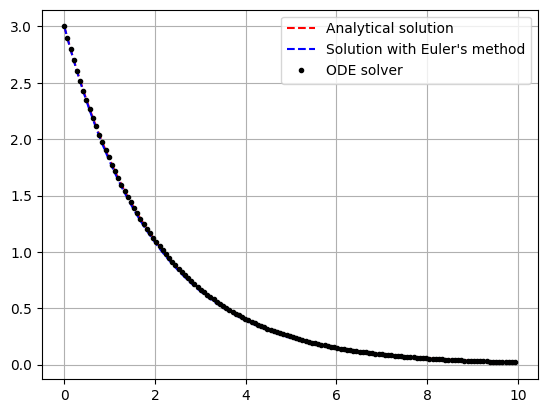

In [14]:
plt.plot(T_2, x_analytical_2, 'r--',  label = 'Analytical solution')
plt.plot(T_2, x_euler_2,'--b', label = 'Solution with Euler\'s method')
plt.plot(T_2, x_odeint_solver_2, 'k.',  label = 'ODE solver')
plt.grid()
plt.legend();